In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
df = pd.read_csv('E:/data/random data/online retail/OnlineRetail.csv', sep=",", encoding="ISO-8859-1", header=0)

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
df=df.dropna()

df['CustomerID']=df['CustomerID'].astype(str)

df['amount']=df['Quantity']*df['UnitPrice']
rfm_m=df.groupby('CustomerID')['amount'].sum()

rfm_f=df.groupby('CustomerID')['InvoiceNo'].count()

rfm_f=rfm_f.reset_index()
rfm_m=rfm_m.reset_index()

rfm_f.columns=['CustomerID','frequency']

df['date']=pd.to_datetime(df['InvoiceDate'])

max_date=max(df['date'])

rfm_r=max_date-df['date']

rfm_r=rfm_r.dt.days

df['recency']=rfm_r

rfm_r=df.groupby('CustomerID')['recency'].min()

rfm_r=rfm_r.reset_index()

rfm=pd.merge(rfm_r,rfm_f,on='CustomerID')

rfm=pd.merge(rfm,rfm_m,on='CustomerID')

C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\dell\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

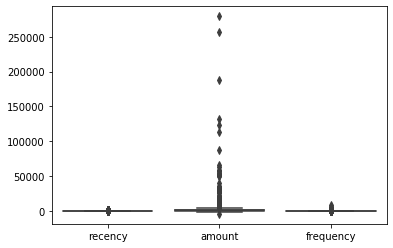

In [6]:
attri=['recency','amount','frequency']
sns.boxplot(data=rfm[attri])

In [7]:
# Removing (statistical) outliers for Amount
Q1 = rfm.amount.quantile(0.05)
Q3 = rfm.amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.amount >= Q1 - 1.5*IQR) & (rfm.amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.recency.quantile(0.05)
Q3 = rfm.recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.recency >= Q1 - 1.5*IQR) & (rfm.recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.frequency.quantile(0.05)
Q3 = rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.frequency >= Q1 - 1.5*IQR) & (rfm.frequency <= Q3 + 1.5*IQR)]

In [8]:
rfm

,CustomerID,recency,frequency,amount
0,12346.0,326,2,0.00
1,12347.0,40,182,4310.00
2,12348.0,76,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,311,17,334.40
...,...,...,...,...
4366,18278.0,74,9,173.90
4367,18280.0,160,10,180.60
4368,18281.0,4,7,80.82
4369,18282.0,93,13,176.60


In [9]:
# Rescaling the attributes

rfm_df = rfm[['amount', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
df = scaler.fit_transform(rfm_df)

In [10]:
df=pd.DataFrame(df, columns=['amount','frequency','recency'])

In [11]:
df

,amount,frequency,recency
0,-0.723738,-0.752888,1.954651
1,1.731617,1.042467,-0.546982
2,0.300128,-0.463636,-0.232091
3,0.277517,-0.044720,-0.730668
4,-0.533235,-0.603275,1.823447
...,...,...,...
4288,-0.624669,-0.683068,-0.249585
4289,-0.620853,-0.673094,0.502654
4290,-0.677696,-0.703017,-0.861873
4291,-0.623131,-0.643171,-0.083393


In [12]:
kmeans=KMeans(n_clusters=5)

In [13]:
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

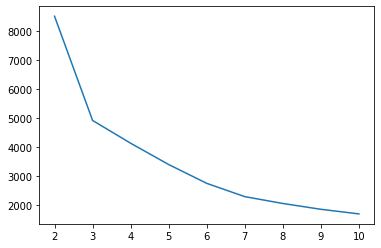

In [91]:

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
sns.lineplot(x=range_n_clusters,y=ssd)

In [92]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.6147594921779221
For n_clusters=3, the silhouette score is 0.5499820709601524
For n_clusters=4, the silhouette score is 0.5498254622260508
For n_clusters=5, the silhouette score is 0.44633754194405745
For n_clusters=6, the silhouette score is 0.4658494737190112
For n_clusters=7, the silhouette score is 0.4694618954058945
For n_clusters=8, the silhouette score is 0.47204645540269047
For n_clusters=9, the silhouette score is 0.38920102039153726
For n_clusters=10, the silhouette score is 0.3703278030001241


In [16]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
df['clusterID']=kmeans.labels_

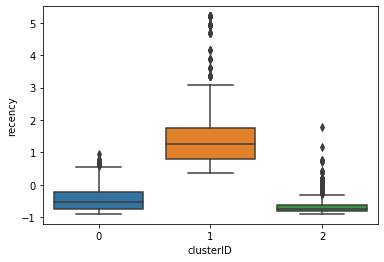

In [18]:
sns.boxplot(x='clusterID',y='recency',data=df)

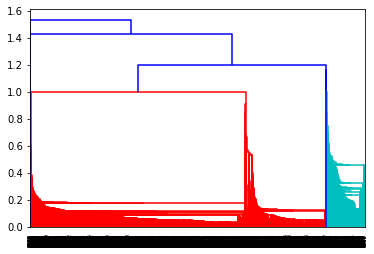

In [19]:

mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

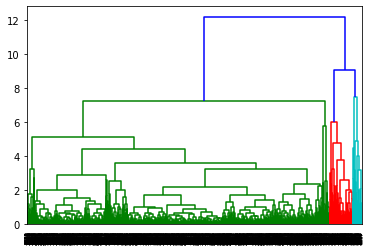

In [20]:

mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

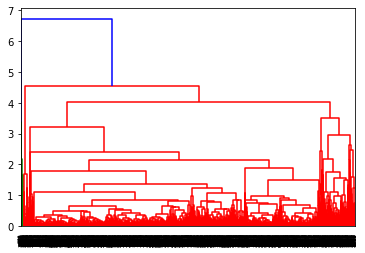

In [21]:
# Average linkage

mergings = linkage(df, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [89]:
dbscan=DBSCAN(eps=0.2,min_samples=19)
clusters=dbscan.fit(df)
labels=clusters.labels_

In [90]:
# silhouette score
silhouette_avg = silhouette_score(df, labels)
print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=8, the silhouette score is 0.4080995051467517


In [63]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df)
distances,indices=nbrs.kneighbors(df)

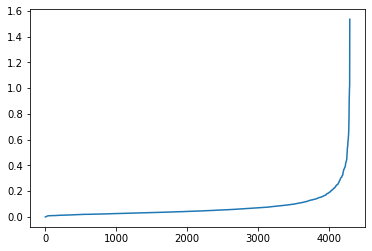

In [64]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)